In [ ]:
Libraries Used:
pandas: Data manipulation and analysis.
pycaret.clustering: PyCaret's clustering module, which simplifies the clustering process.
numpy: For numerical operations.
matplotlib.pyplot: For data visualization.
make_moons: A dataset generator from sklearn that creates a two-class dataset with a crescent moon shape.
DBSCAN: A clustering algorithm that groups together closely packed data points, marking outliers as noise.

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.8 MB/s eta 0:00:00
   ━━━━

In [ ]:
import pandas as pd
from pycaret.clustering import *

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

Functionality: Creates a synthetic dataset with 300 samples in the shape of two interleaving half moons, with a small amount of noise added (noise=0.05).

In [ ]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

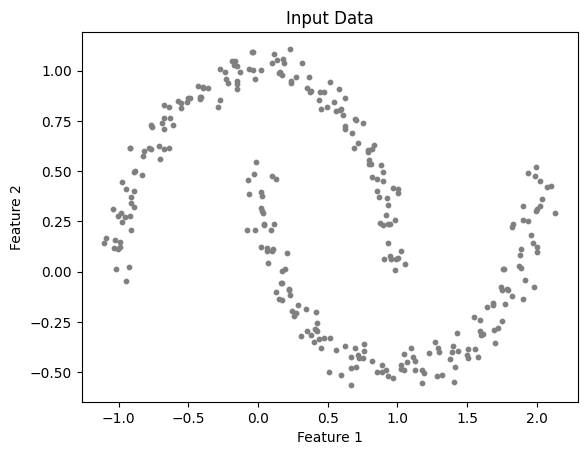

In [ ]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=10, c='gray')
plt.title("Input Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

DBSCAN Explanation:
eps=0.2: Maximum distance between two points to be considered neighbors.
min_samples=5: Minimum number of samples required to form a dense region (i.e., a cluster).
fit_predict(X): Applies the DBSCAN algorithm to the data and returns cluster labels. Points that don't belong to any cluster are assigned -1 (outliers).

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

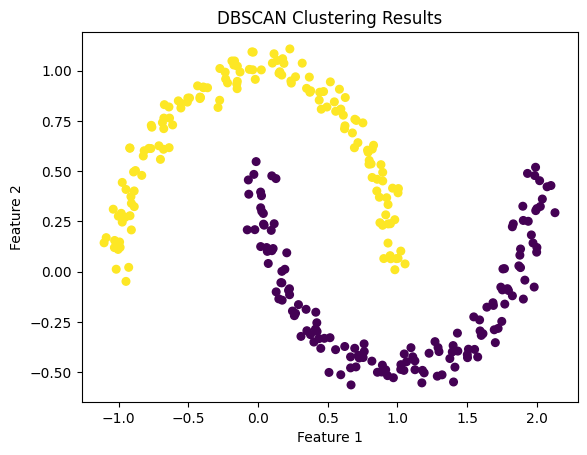

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=30)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Functionality: Generates a new dataset with 500 samples, split into 4 centers (clusters) with a standard deviation of 1.1. This data will be used to demonstrate clustering performance.

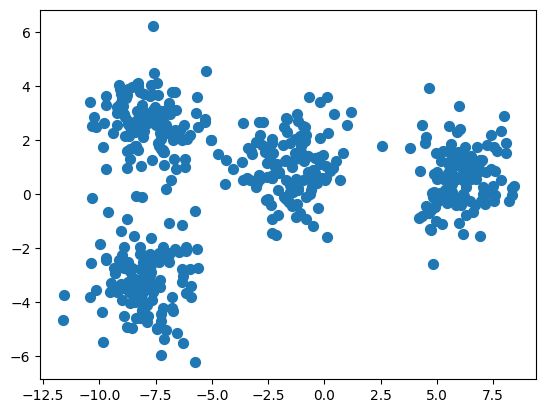

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=1.1, random_state=999)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
setup(X, normalize=True)

,Description,Value
0,Session id,6360
1,Original data shape,"(500, 2)"
2,Transformed data shape,"(500, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [ ]:
dbscan_model = create_model('dbscan', eps=0.3, min_samples=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5508,543.0181,4.5647,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
cluster_labels = dbscan_model.labels_
cluster_labels

array([ 0,  1,  2,  2,  1, -1,  1,  1,  2,  1,  0,  2,  1,  1,  0,  0,  2,
        1,  0,  2,  0,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  0,  1,  2,
        0,  0,  0,  0, -1,  0,  1,  2,  1,  1,  1,  0,  1,  2,  1,  0,  2,
        2,  1,  2,  0,  1,  2,  2,  2,  1,  0,  1,  1,  1,  1,  1,  0,  0,
        1,  2,  1,  1,  0,  1,  0,  0,  1,  0,  0,  1, -1,  0,  1,  2,  1,
        0,  0,  0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  2,  0,  0,  1,  0,
        2,  2,  1,  1,  0,  1,  2,  0,  1,  0,  1,  1,  1,  1,  0,  1,  2,
        2,  0,  0,  1,  0,  0,  1,  2,  0,  0,  2,  1,  2,  0,  0,  2,  1,
        1,  2,  2,  0,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,
        1,  2,  2,  1,  1,  1,  2,  0,  1,  1,  0,  1,  0,  0,  2,  1,  2,
        0,  1,  1,  0,  0,  1,  2,  0,  1,  1,  2,  0,  0,  1,  0,  0,  1,
        1,  1,  0,  2,  0,  1,  1,  1,  2,  1,  1,  0,  1,  1,  1,  0,  2,
        2,  1,  1,  2,  1,  0,  2,  1,  0,  0,  0,  1,  0,  1,  1,  0,  1,
        1,  1,  0,  1,  2

Purpose: Visualizes the results of the DBSCAN clustering with PyCaret. The c=cluster_labels argument colors the points based on their cluster membership.

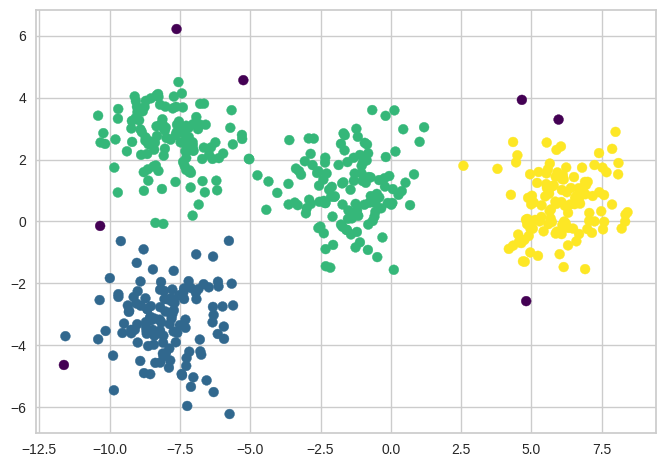

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(cluster_labels)
labels.fill(-1)
for i in range(10):
    mask = (cluster_labels == i)
    labels[mask] = mode(y_true[mask])[0]
labels

array([ 2,  3,  0,  0,  3, -1,  3,  3,  0,  3,  2,  0,  3,  3,  2,  2,  0,
        3,  2,  0,  2,  3,  0,  3,  3,  3,  3,  3,  0,  3,  0,  2,  3,  0,
        2,  2,  2,  2, -1,  2,  3,  0,  3,  3,  3,  2,  3,  0,  3,  2,  0,
        0,  3,  0,  2,  3,  0,  0,  0,  3,  2,  3,  3,  3,  3,  3,  2,  2,
        3,  0,  3,  3,  2,  3,  2,  2,  3,  2,  2,  3, -1,  2,  3,  0,  3,
        2,  2,  2,  3,  3,  3,  3,  2,  3,  3,  3,  3,  0,  2,  2,  3,  2,
        0,  0,  3,  3,  2,  3,  0,  2,  3,  2,  3,  3,  3,  3,  2,  3,  0,
        0,  2,  2,  3,  2,  2,  3,  0,  2,  2,  0,  3,  0,  2,  2,  0,  3,
        3,  0,  0,  2,  3,  3,  3,  3,  3,  3,  0,  3,  3,  0,  3,  3,  3,
        3,  0,  0,  3,  3,  3,  0,  2,  3,  3,  2,  3,  2,  2,  0,  3,  0,
        2,  3,  3,  2,  2,  3,  0,  2,  3,  3,  0,  2,  2,  3,  2,  2,  3,
        3,  3,  2,  0,  2,  3,  3,  3,  0,  3,  3,  2,  3,  3,  3,  2,  0,
        0,  3,  3,  0,  3,  2,  0,  3,  2,  2,  2,  3,  2,  3,  3,  2,  3,
        3,  3,  2,  3,  0

Confusion Matrix: Compares the predicted cluster labels (labels) with the true labels (y_true), helping assess how well the clustering algorithm has matched the actual clusters.
The confusion matrix provides insight into the misclassification between true labels and predicted clusters.
The heatmap visualizes this matrix for easier interpretation. The annot=True parameter annotates the matrix with numbers, and cmap='Blues' defines the color scheme.

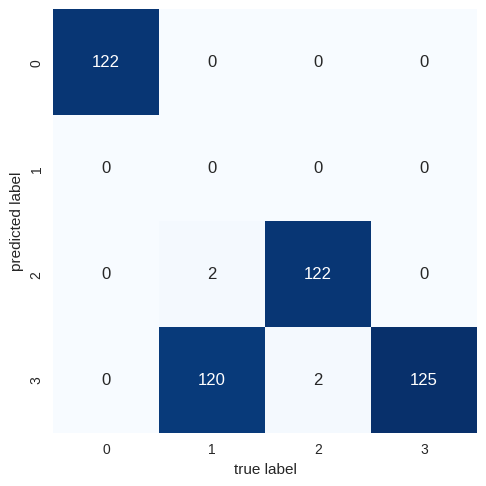

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, labels, labels=[0,1,2,3])
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel('true label')
plt.ylabel('predicted label');